# Linear Regression from Scratch — Multi-Dimensional Gradient Descent


###  About This Notebook

This notebook builds **Linear Regression completely from scratch** using only NumPy —  
starting with a simple 1D example and extending it to **multi-dimensional (multi-feature)** data.

We’ll go step by step through:
- Deriving the **mathematical formulas** behind Linear Regression  
- Implementing **Gradient Descent manually**  
- Visualizing **MSE convergence over iterations**  
- Comparing results with the **Normal Equation (closed-form)** solution  

No scikit-learn shortcuts — just pure math, Python, and understanding 🔥  

---

###  What You’ll Learn

-  How to compute predictions:  $\hat{y} = Xw$  
-  Derive cost function & gradients for all $w_0, w_1, …, w_n$  
-  Implement the Gradient Descent update rule:  
   := w - \alpha \cdot \frac{1}{m} X^T(Xw - y)$  
-  Compare **Gradient Descent vs. Normal Equation**  
-  Visualize the learning process (MSE vs Epochs)

---

### Skills Gained
- Machine Learning Fundamentals  
- Linear Algebra & Matrix Operations  
- Optimization using Gradient Descent  
- Python + NumPy Implementation Skills  

---

### Great For
- Beginners learning how regression really works  
- Students preparing for **ML interviews or exams**  
- Anyone who wants to understand what happens *under the hood* of `LinearRegression()`

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 1. Creating Synthetic Linear DataPoints

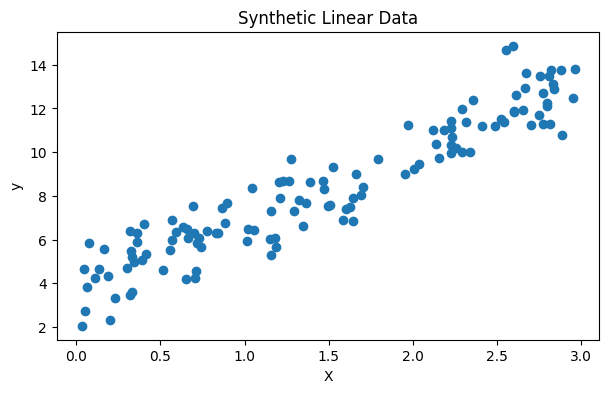

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic linear data
x = 3 * np.random.rand(125, 1)
y = 4 + 3 * x + np.random.randn(125, 1)

# Visualize the data
plt.figure(figsize=(7,4))
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Linear Data")
plt.show()

Formula of Linear Regression

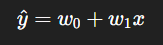

How to calculate the w1 and w0

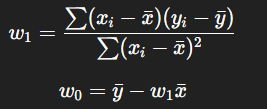

In [3]:
# Now this one work for demo like 1 and 2 points  but we have n number of data ponts in the data set so we have to implement the itrative method to compute the formula

x_mean = x.mean()
y_mean = y.mean()


w1 = np.sum((x-x_mean)*(y-y_mean)) / np.sum((x-x_mean)**2)
w0 = y_mean - w1*x_mean

y_hat = w0 + w1*x

In [4]:
print(w0,w1)

3.7150603054798097 3.1465928627744124


In [5]:
print(y_hat)

[[ 6.52501209]
 [ 7.36151723]
 [11.89432466]
 [ 9.36090507]
 [ 4.72305617]
 [ 8.45429136]
 [ 4.84544077]
 [ 5.9391747 ]
 [ 4.23923083]
 [ 5.9486816 ]
 [11.88561   ]
 [10.8209398 ]
 [ 3.9560416 ]
 [ 6.01289727]
 [12.5993741 ]
 [10.93428089]
 [ 9.91207825]
 [12.21919338]
 [ 4.06840348]
 [ 8.70372068]
 [ 7.69700341]
 [ 5.96964204]
 [ 6.15690519]
 [ 6.33213224]
 [ 4.74429852]
 [ 4.84446575]
 [10.45240012]
 [11.70958704]
 [ 9.04400194]
 [ 4.35172789]
 [ 8.88882437]
 [10.39566181]
 [ 6.48891999]
 [ 6.04531794]
 [10.72280958]
 [ 3.81319008]
 [12.52165442]
 [ 3.85980007]
 [10.74757812]
 [11.30072609]
 [ 4.13273097]
 [ 8.35092622]
 [10.4911939 ]
 [11.00716099]
 [ 6.910822  ]
 [11.08462392]
 [ 4.76020643]
 [ 5.79914141]
 [ 5.92251384]
 [ 8.33265812]
 [ 7.34977782]
 [ 5.58609908]
 [10.92757839]
 [ 5.02429459]
 [ 4.72350782]
 [12.38840314]
 [ 8.02037061]
 [12.4471791 ]
 [12.11730665]
 [ 7.955316  ]
 [12.57480158]
 [ 3.88278683]
 [ 4.78844297]
 [ 4.66386214]
 [11.54409298]
 [ 8.88296591]
 [ 9.07321

## Evaluate Your Line

In [6]:
res = y-y_hat

In [7]:
res


array([[ 1.13128731e+00],
       [-2.08457103e+00],
       [-2.69978272e-02],
       [ 3.40493251e-01],
       [-1.24523202e+00],
       [-8.69532950e-01],
       [ 1.47476599e+00],
       [-1.71502216e+00],
       [ 1.32887866e+00],
       [-1.38384222e+00],
       [ 2.98607941e+00],
       [-6.08212698e-01],
       [ 1.88253105e+00],
       [ 7.73960836e-02],
       [ 1.15839431e+00],
       [ 1.03787899e+00],
       [ 1.32997766e+00],
       [-9.76092995e-01],
       [ 1.72460494e-01],
       [-1.80474556e+00],
       [ 1.00214849e+00],
       [-1.16872491e-01],
       [ 2.60421360e-01],
       [-9.80974839e-03],
       [ 7.18737991e-01],
       [ 1.03191751e+00],
       [-9.52467813e-02],
       [-3.38089320e-01],
       [-9.94605574e-01],
       [-2.04953041e+00],
       [-2.03618082e+00],
       [ 6.36063801e-01],
       [ 2.76625774e-01],
       [-3.64934112e-01],
       [-3.88038887e-01],
       [-1.75120058e+00],
       [-4.20415027e-01],
       [ 7.85035141e-01],
       [-3.5

##  Impliment Loss Fuc^n MSE / RMSE / MAE


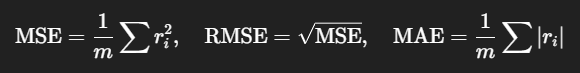

In [8]:
MSE = np.mean(res**2)
RMSE = np.sqrt(res)
MAE = np.mean(np.abs(res))

/tmp/ipython-input-216601683.py:2: RuntimeWarning: invalid value encountered in sqrt
  RMSE = np.sqrt(res)


## Gradient Descent :(

Fromula of GD

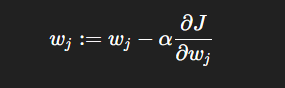

In [9]:
# Alpha is nothing but Learning rate default value is 0.001 you can change it accordingly

grad_w0 = res.mean()
grad_w1 = (res*x).mean(())

Learning_rate = 0.001
w0 -= Learning_rate*grad_w0
w1 -= Learning_rate*grad_w1

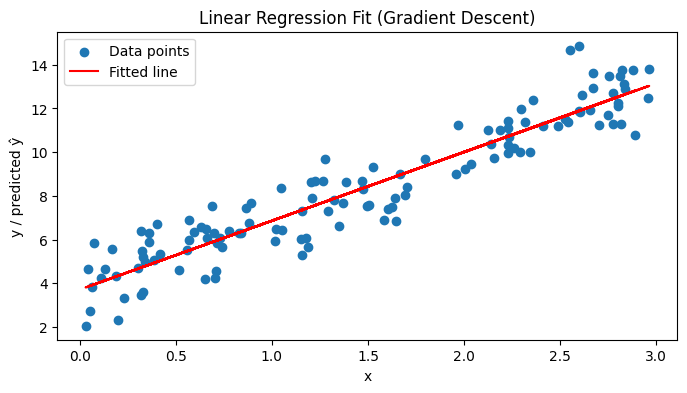

In [10]:
# predicted line
y_hat = w0 + w1 * x

# scatter of data
plt.figure(figsize=(8,4))
plt.scatter(x, y, label='Data points')

# plot fitted line
# sort x for a smooth line
x_sorted = np.sort(x)
y_line = w0 + w1 * x_sorted
plt.plot(x_sorted, y_line, color='red', label='Fitted line')

# labels and legend
plt.xlabel("x")
plt.ylabel("y / predicted ŷ")
plt.title("Linear Regression Fit (Gradient Descent)")
plt.legend()
plt.show()


as you can see this is the best fit line we can get with !D Linear regression

In [11]:
MSE

np.float64(1.0679537979609512)

## Linear Regression For 2D

In [12]:
# 2D data for 2D Linear Regression

x = np.array([
    [1, 2, 3],
    [2, 1, 0],
    [3, 4, 5],
    [4, 2, 1],
    [5, 3, 2]
])
y = np.array([10, 8, 20, 15, 18])

So we must build a matrix
Xb
that includes a column of 1’s to multiply by
𝑤
0
(the intercept)



In [13]:
# matrix 𝑋𝑏
x_b = np.c_[(np.ones((x.shape[0],1))),x]

In [14]:
x_b

array([[1., 1., 2., 3.],
       [1., 2., 1., 0.],
       [1., 3., 4., 5.],
       [1., 4., 2., 1.],
       [1., 5., 3., 2.]])

2D Linear Regression

In [20]:
# Initialize parameters

Learning_rate = 0.001       # Learning rate
epoch = 1000                 # Iterations
m = len(y)                  # Number of samples             Role: Normalizes gradient: 1/m
w = np.zeros(x_b.shape[1])  # Weight vector (parameters)    Role: Stores [bias + slopes]

losses = []                 # append Losses to see at each Iterations

for i in range(epoch):
  y_hat = x_b @ w
  res = y_hat-y
  grad = (x_b.T @ res)/m
  w -= Learning_rate*grad
  mse = np.mean(res**2)
  losses.append(mse)

print("Learned weights:", np.round(w, 4))
print("Final MSE:", round(losses[-1], 4))


Learned weights: [0.8312 2.2465 1.5791 1.1979]
Final MSE: 0.6727


Normal Equation weights: [2.3 1.6 2.5 0.5]


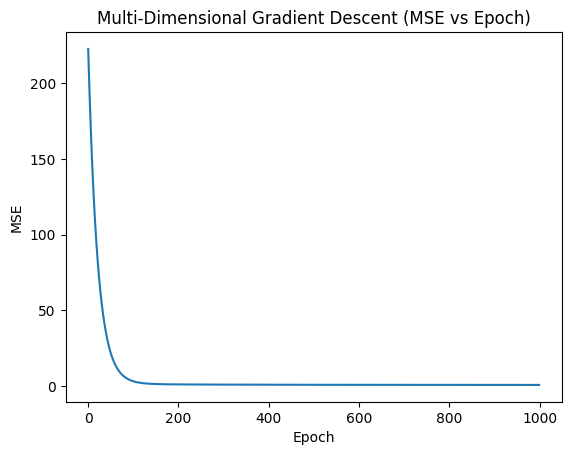

In [21]:
w_closed, *_ = np.linalg.lstsq(x_b, y, rcond=None)
print("Normal Equation weights:", np.round(w_closed, 4))

# Plot MSE vs Epoch
plt.plot(losses)
plt.title("Multi-Dimensional Gradient Descent (MSE vs Epoch)")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

upvote if you learned or revised anything :)